In [ ]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

data = np.random.random((100,2))
diagrams = ripser(data)['dgms']
plot_diagrams(diagrams, show=True)

In [ ]:
np.array(data).shape

In [ ]:
import numpy as np
from ripser import Rips

rips = Rips()
data = np.random.random((100,2))
diagrams = rips.fit_transform(data)
rips.plot(diagrams)

<br><br><br><br><br>

### Demonstrate usage of pyRipser

pyRipser is a python wrapper to the Ripser library for computing Vietoris-Rips persistence barcodes. 

For the library to work correctly, either "ripser" executable should be on the system path or the path to ripser has to be provided.

In [1]:
import numpy as np
from pyRipser import *

#### Generate data for testing

We first generate a list of numpy arrays which will be our input distance matrices 

In [2]:
def generate_dist_matrix(n):
    # generate uniform random square matrix of size n
    mat = np.random.uniform(size=(n, n))
    print(mat)
    # make it symmetric
    mat_symm = (mat + mat.T) / 2
    
    # set diagonal indices to 1
    diag_indices = np.arange(len(mat))
    mat_symm[diag_indices, diag_indices] = 1
    
    return mat_symm

distance_mat_size = 10
num_matrices = 3

data = [generate_dist_matrix(distance_mat_size) for i in range(num_matrices)]

[[0.47644844 0.35747325 0.28861531 0.81611351 0.63625525 0.07210241
  0.95900522 0.12273462 0.36577173 0.66281463]
 [0.3867709  0.9688781  0.48155596 0.21969823 0.1006106  0.87773787
  0.41572465 0.62470775 0.73320563 0.18637162]
 [0.91489131 0.21540281 0.43438632 0.59671042 0.73921814 0.32022631
  0.33181343 0.76656515 0.68394213 0.76601437]
 [0.92067811 0.86748553 0.03850955 0.22225321 0.32129842 0.23210228
  0.55093503 0.91841787 0.62775627 0.49102372]
 [0.25611672 0.68728085 0.01925549 0.6202255  0.69012883 0.04165753
  0.36355037 0.43841276 0.16808574 0.98857802]
 [0.79077066 0.65655088 0.31496001 0.61834899 0.74595577 0.4400046
  0.10218818 0.75158659 0.12764574 0.77541757]
 [0.81227126 0.09226184 0.0268001  0.40314195 0.83465522 0.5669321
  0.08873387 0.92923994 0.16096867 0.32600769]
 [0.41789223 0.74364486 0.43543869 0.78483165 0.82660759 0.47196609
  0.73116789 0.55212741 0.74444168 0.91745288]
 [0.42736729 0.19929731 0.87979158 0.61750092 0.87636952 0.26093903
  0.45937974 0

In [3]:
np.array(data).shape

(3, 10, 10)

In [4]:
np.array(data)

array([[[1.        , 0.37212207, 0.60175331, 0.86839581, 0.44618598,
         0.43143654, 0.88563824, 0.27031342, 0.39656951, 0.40610413],
        [0.37212207, 1.        , 0.34847938, 0.54359188, 0.39394572,
         0.76714438, 0.25399324, 0.6841763 , 0.46625147, 0.48874139],
        [0.60175331, 0.34847938, 1.        , 0.31760999, 0.37923682,
         0.31759316, 0.17930676, 0.60100192, 0.78186685, 0.40832395],
        [0.86839581, 0.54359188, 0.31760999, 1.        , 0.47076196,
         0.42522564, 0.47703849, 0.85162476, 0.62262859, 0.50045942],
        [0.44618598, 0.39394572, 0.37923682, 0.47076196, 1.        ,
         0.39380665, 0.59910279, 0.63251018, 0.52222763, 0.71525348],
        [0.43143654, 0.76714438, 0.31759316, 0.42522564, 0.39380665,
         1.        , 0.33456014, 0.61177634, 0.19429239, 0.54731457],
        [0.88563824, 0.25399324, 0.17930676, 0.47703849, 0.59910279,
         0.33456014, 1.        , 0.83020391, 0.3101742 , 0.63374279],
        [0.27031342, 0.6841

#### Set up the Ripser instance
Presently the code requires the path to the `ripser` executable to be provided. The folder contains pre-built executables for Linux (Ubuntu 16.04) and Windows 10.

`Ripser` class takes two arguments - the path of the binary and the dimensions upto which the barcode is computed.

In [5]:
ripser = Ripser('./ripser', dim=1)
pers_diags = ripser.compute_pd(data)

Serializing to disk:   0%|          | 0/3 [00:00<?, ?it/s]

Running Ripser:   0%|          | 0/3 [00:00<?, ?it/s]

#### Visualize the persistence diagram

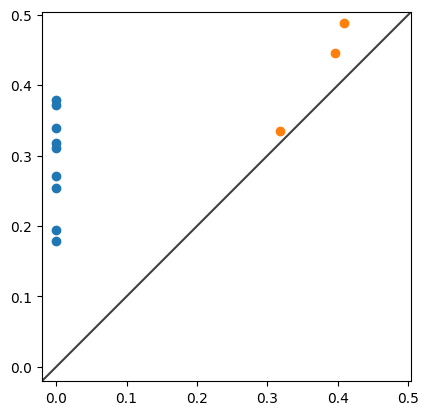

In [6]:
pers_diags[0].show_diagram()

In [7]:
np.array(pers_diags).shape

(3,)

In [8]:
pers_diags[0].to_np_array().shape

(12, 3)

In [9]:
pers_diags[0].to_np_array()

array([[0.      , 0.      , 0.179307],
       [0.      , 0.      , 0.194292],
       [0.      , 0.      , 0.253993],
       [0.      , 0.      , 0.270313],
       [0.      , 0.      , 0.310174],
       [0.      , 0.      , 0.31761 ],
       [0.      , 0.      , 0.338939],
       [0.      , 0.      , 0.372122],
       [0.      , 0.      , 0.379237],
       [1.      , 0.408324, 0.488741],
       [1.      , 0.39657 , 0.446186],
       [1.      , 0.317593, 0.33456 ]])

## Using FOSCAL data (ACV-089)

In [10]:
points1 = []
points2 = []
points3 = []

f = open('comps1.txt')
line = f.readline().strip()
while(line):
    #print(line.split(",")[0], line.split(",")[1])
    points1.append([float(line.split(",")[0]), float(line.split(",")[1])])
    line = f.readline().strip()
f.close()

f = open('comps2.txt')
line = f.readline().strip()
while(line):
    #print(line.split(",")[0], line.split(",")[1])
    points2.append([float(line.split(",")[0]), float(line.split(",")[1])])
    line = f.readline().strip()
f.close()

f = open('comps3.txt')
line = f.readline().strip()
while(line):
    #print(line.split(",")[0], line.split(",")[1])
    points3.append([float(line.split(",")[0]), float(line.split(",")[1])])
    line = f.readline().strip()
f.close()

In [11]:
def distancia(p1,p2):
    if np.array(p1).shape[0]==2:
        d = np.sqrt(pow((p1[0]-p2[0]),2)+pow((p1[1]-p2[1]),2))
    else:
        d = np.sqrt(pow((p1[0]-p2[0]),2)+pow((p1[1]-p2[1]),2)+pow((p1[2]-p2[2]),2))
    return d

In [12]:
print(points1[2], points1[3])
print(distancia(points1[2], points1[3]))

[1.16075, -0.9488454] [1.9684001, -1.5749818]
1.021932226439195


In [309]:
t0_x_min = np.min(np.array(points1)[:,0])
t0_x_max = np.max(np.array(points1)[:,0])
t0_y_min = np.min(np.array(points1)[:,1])
t0_y_max = np.max(np.array(points1)[:,1])
t0_dx = (t0_x_max-t0_x_min)/30
t0_dy = (t0_y_max-t0_y_min)/30

t1_x_min = np.min(np.array(points2)[:,0])
t1_x_max = np.max(np.array(points2)[:,0])
t1_y_min = np.min(np.array(points2)[:,1])
t1_y_max = np.max(np.array(points2)[:,1])
t1_dx = (t1_x_max-t1_x_min)/30
t1_dy = (t1_y_max-t1_y_min)/30

t2_x_min = np.min(np.array(points3)[:,0])
t2_x_max = np.max(np.array(points3)[:,0])
t2_y_min = np.min(np.array(points3)[:,1])
t2_y_max = np.max(np.array(points3)[:,1])
t2_dx = (t2_x_max-t2_x_min)/30
t2_dy = (t2_y_max-t2_y_min)/30

print("t0_x_width",t0_x_max-t0_x_min)

print("dx",t0_dx, "dy",t0_dy)
print("dx",t1_dx, "dy",t1_dy)
print("dx",t2_dx, "dy",t2_dy)

t0_x_width 6.4070539
dx 0.21356846333333335 dy 0.2616418
dx 0.26252647333333334 dy 0.13880878000000002
dx 0.3037494 dy 0.17462454


In [294]:
#print(points1[1].extend([4.28]))
z = 0
for i in points1:
    i.extend([z])
    z = z+t0_dx

In [295]:
z = 0
for i in points2:
    i.extend([z])
    z = z+t1_dx

In [296]:
z = 0
for i in points3:
    i.extend([z])
    z = z+t2_dx

In [13]:
np.array(points1)[:,0]

array([-0.52307665,  0.6960314 ,  1.16075   ,  1.9684001 ,  2.0446837 ,
        1.1831678 ,  0.47293052,  0.07247104, -0.5683917 , -1.356912  ,
       -1.5007671 , -1.5885047 , -1.564175  , -1.5051329 , -1.4924988 ,
       -1.5020636 , -1.5887141 , -1.6432385 , -1.6357579 , -1.596853  ,
       -1.5207891 , -1.4040388 , -1.0324328 , -0.3167197 ,  0.8528319 ,
        2.38809   ,  4.0162625 ,  4.7638154 ,  3.463491  , -0.7428629 ])

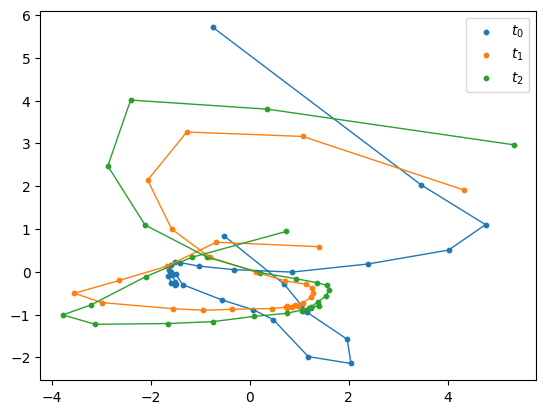

In [14]:
plt.scatter(np.array(points1)[:,0], np.array(points1)[:,1], s=10, label="$t_0$")
plt.scatter(np.array(points2)[:,0], np.array(points2)[:,1], s=10, label="$t_1$")
plt.scatter(np.array(points3)[:,0], np.array(points3)[:,1], s=10, label="$t_2$")
plt.plot(np.array(points1)[:,0], np.array(points1)[:,1], lw=1)
plt.plot(np.array(points2)[:,0], np.array(points2)[:,1], lw=1)
plt.plot(np.array(points3)[:,0], np.array(points3)[:,1], lw=1)
plt.legend()
plt.show()

In [15]:
todasfilas = []
filas = []
fila = []

for i in range(len(points1)):
    for j in range(len(points1)):
        fila.append(distancia(points1[i], points1[j]))
    filas.append(fila)
    fila = []
todasfilas.append(filas)

filas = []
for i in range(len(points2)):
    for j in range(len(points2)):
        fila.append(distancia(points2[i], points2[j]))
    filas.append(fila)
    fila = []
todasfilas.append(filas)

filas = []
for i in range(len(points3)):
    for j in range(len(points3)):
        fila.append(distancia(points3[i], points3[j]))
    filas.append(fila)
    fila = []
todasfilas.append(filas)


In [16]:
m = np.array(todasfilas)
diag_indices = np.arange(len(m[0]))
#print(diag_indices)
m[0][diag_indices, diag_indices] = 0
m[1][diag_indices, diag_indices] = 0
m[2][diag_indices, diag_indices] = 0

In [17]:
ripser = Ripser('./ripser', dim=1)
pers_diags1 = ripser.compute_pd(m[0])
pers_diags2 = ripser.compute_pd(m[1])
pers_diags3 = ripser.compute_pd(m[2])

Serializing to disk:   0%|          | 0/1 [00:00<?, ?it/s]

Running Ripser:   0%|          | 0/1 [00:00<?, ?it/s]

Serializing to disk:   0%|          | 0/1 [00:00<?, ?it/s]

Running Ripser:   0%|          | 0/1 [00:00<?, ?it/s]

Serializing to disk:   0%|          | 0/1 [00:00<?, ?it/s]

Running Ripser:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
np.array(pers_diags1).shape

(1,)

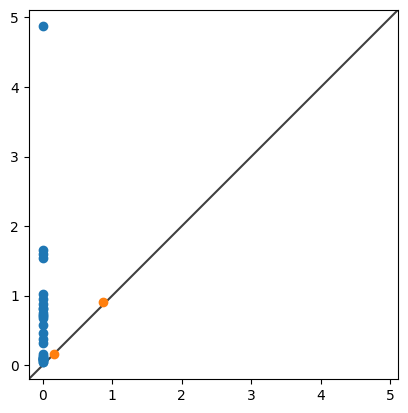

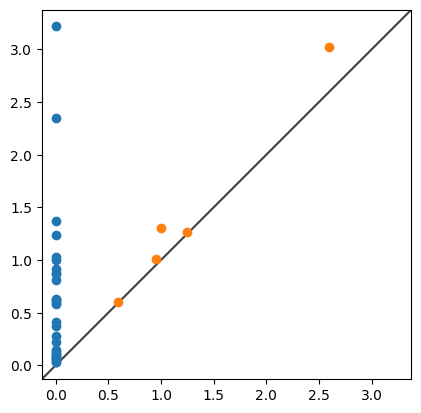

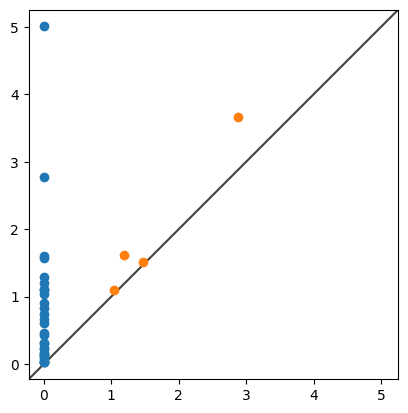

In [19]:
pers_diags1[0].show_diagram()
pers_diags2[0].show_diagram()
pers_diags3[0].show_diagram()

In [20]:
pers_diags1[0].to_np_array()

array([[0.       , 0.       , 0.0384838],
       [0.       , 0.       , 0.0439255],
       [0.       , 0.       , 0.0684533],
       [0.       , 0.       , 0.07335  ],
       [0.       , 0.       , 0.0818068],
       [0.       , 0.       , 0.0856866],
       [0.       , 0.       , 0.0922471],
       [0.       , 0.       , 0.106026 ],
       [0.       , 0.       , 0.107376 ],
       [0.       , 0.       , 0.117482 ],
       [0.       , 0.       , 0.138098 ],
       [0.       , 0.       , 0.153564 ],
       [0.       , 0.       , 0.323903 ],
       [0.       , 0.       , 0.380008 ],
       [0.       , 0.       , 0.460051 ],
       [0.       , 0.       , 0.571551 ],
       [0.       , 0.       , 0.682444 ],
       [0.       , 0.       , 0.707642 ],
       [0.       , 0.       , 0.72082  ],
       [0.       , 0.       , 0.746889 ],
       [0.       , 0.       , 0.806611 ],
       [0.       , 0.       , 0.820583 ],
       [0.       , 0.       , 0.87624  ],
       [0.       , 0.       , 0.95

In [21]:
pers_diags2[0].to_np_array()

array([[0.       , 0.       , 0.027196 ],
       [0.       , 0.       , 0.0296758],
       [0.       , 0.       , 0.0594493],
       [0.       , 0.       , 0.0605726],
       [0.       , 0.       , 0.0760318],
       [0.       , 0.       , 0.0810038],
       [0.       , 0.       , 0.0955383],
       [0.       , 0.       , 0.108443 ],
       [0.       , 0.       , 0.122107 ],
       [0.       , 0.       , 0.1457   ],
       [0.       , 0.       , 0.218974 ],
       [0.       , 0.       , 0.277169 ],
       [0.       , 0.       , 0.37565  ],
       [0.       , 0.       , 0.415053 ],
       [0.       , 0.       , 0.584045 ],
       [0.       , 0.       , 0.590079 ],
       [0.       , 0.       , 0.62105  ],
       [0.       , 0.       , 0.624055 ],
       [0.       , 0.       , 0.629179 ],
       [0.       , 0.       , 0.808942 ],
       [0.       , 0.       , 0.871009 ],
       [0.       , 0.       , 0.879593 ],
       [0.       , 0.       , 0.915822 ],
       [0.       , 0.       , 1.00

In [22]:
pers_diags3[0].to_np_array()

array([[0.       , 0.       , 0.0229014],
       [0.       , 0.       , 0.0260579],
       [0.       , 0.       , 0.0298127],
       [0.       , 0.       , 0.038683 ],
       [0.       , 0.       , 0.0830036],
       [0.       , 0.       , 0.115179 ],
       [0.       , 0.       , 0.129691 ],
       [0.       , 0.       , 0.146668 ],
       [0.       , 0.       , 0.167651 ],
       [0.       , 0.       , 0.215645 ],
       [0.       , 0.       , 0.231727 ],
       [0.       , 0.       , 0.311285 ],
       [0.       , 0.       , 0.318152 ],
       [0.       , 0.       , 0.423097 ],
       [0.       , 0.       , 0.458492 ],
       [0.       , 0.       , 0.609602 ],
       [0.       , 0.       , 0.672478 ],
       [0.       , 0.       , 0.746579 ],
       [0.       , 0.       , 0.835277 ],
       [0.       , 0.       , 0.901322 ],
       [0.       , 0.       , 1.03379  ],
       [0.       , 0.       , 1.09804  ],
       [0.       , 0.       , 1.11784  ],
       [0.       , 0.       , 1.20